In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Section 1

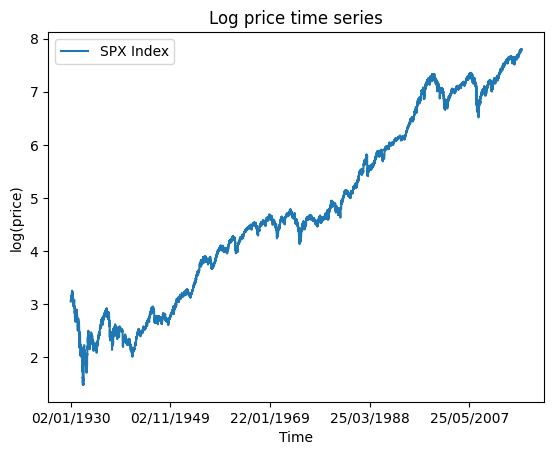

In [34]:
# load
px = pd.read_csv("priceData.csv", index_col=0, parse_dates=True)  # adjust if your file has different cols
# if the index isn't dates, you can skip parse_dates and just plot vs row number

# log price
logpx = np.log(px)

# plot
ax = logpx.plot(title="Log price time series")
ax.set_xlabel("Time")
ax.set_ylabel("log(price)")
plt.show()


In [35]:
print("NaNs per column:\n", px.isna().sum())
print("Non-positive values per column:\n", (px <= 0).sum())


NaNs per column:
 SPX Index    655
dtype: int64
Non-positive values per column:
 SPX Index    0
dtype: int64


<Figure size 1400x500 with 0 Axes>

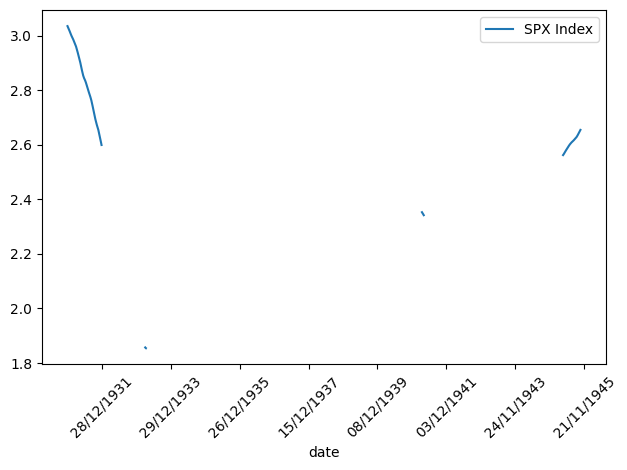

<Figure size 1400x500 with 0 Axes>

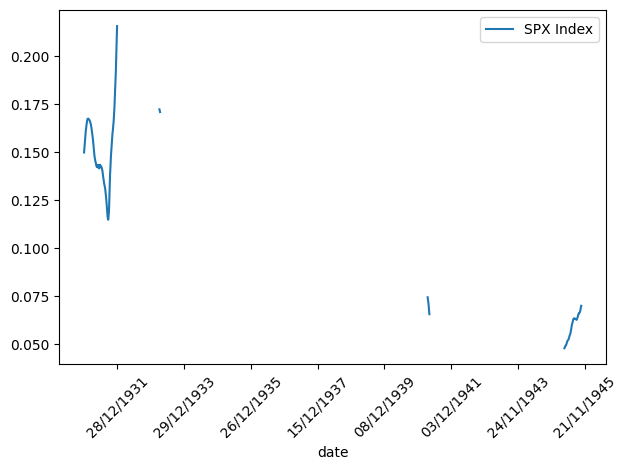

In [36]:
# Rolling mean of LOG PRICE
plt.figure(figsize=(14,5))
logpx.rolling(252).mean().plot()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Rolling std of LOG PRICE
plt.figure(figsize=(14,5))
logpx.rolling(252).std().plot()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/tk/ykrs7y753dn8dmkvm_bk8yzw0000gn/T/ipykernel_22159/2052235454.py:5: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  simpret = px.pct_change()


<Figure size 1400x500 with 0 Axes>

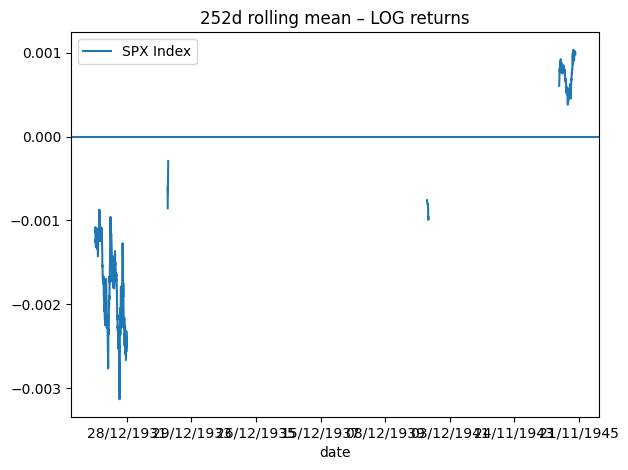

<Figure size 1400x500 with 0 Axes>

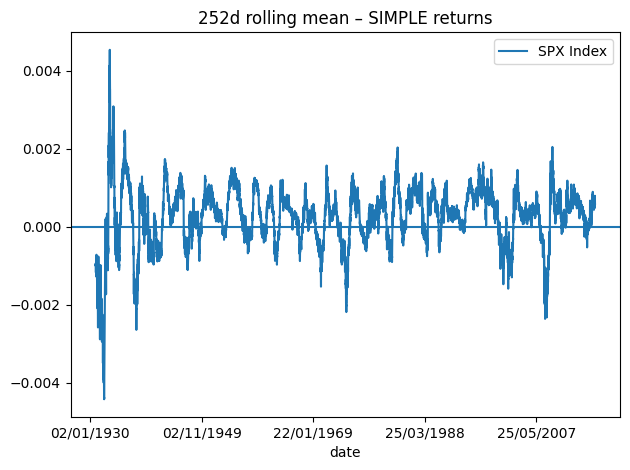

<Figure size 1400x500 with 0 Axes>

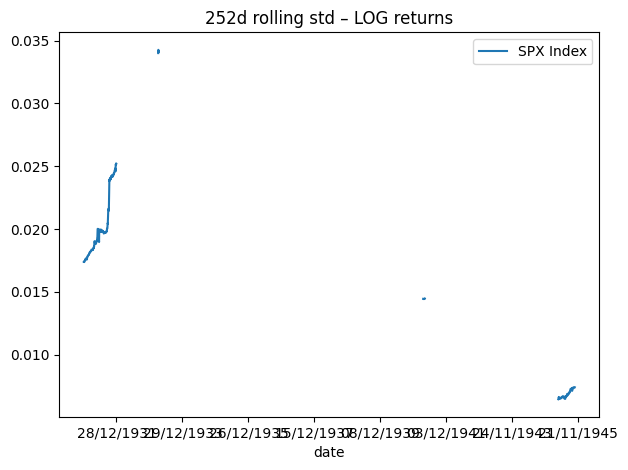

<Figure size 1400x500 with 0 Axes>

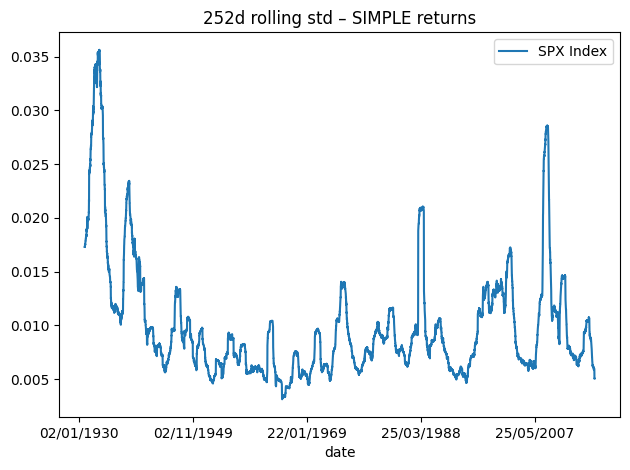

In [37]:
# log returns
logret = logpx.diff()

# simple returns
simpret = px.pct_change()

logret.head(), simpret.head()

# Rolling mean
plt.figure(figsize=(14,5))
logret.rolling(252).mean().plot(title="252d rolling mean – LOG returns")
plt.axhline(0)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14,5))
simpret.rolling(252).mean().plot(title="252d rolling mean – SIMPLE returns")
plt.axhline(0)
plt.tight_layout()
plt.show()


# Rolling std
plt.figure(figsize=(14,5))
logret.rolling(252).std().plot(title="252d rolling std – LOG returns")
plt.tight_layout()
plt.show()

plt.figure(figsize=(14,5))
simpret.rolling(252).std().plot(title="252d rolling std – SIMPLE returns")
plt.tight_layout()
plt.show()
